In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings('ignore')

In [5]:
train_df = pd.read_csv('/kaggle/input/enigma-25/train_data.csv')
test_df = pd.read_csv('/kaggle/input/enigma-25/test_data.csv')
submission = pd.read_csv('/kaggle/input/enigma-25/sample_sumission.csv')

Upon Analysis found out that this Dataset is just a modified extract from Titanic Dataset

Rename the Possible Columns for Easier Processing

In [6]:
column_names = {
    'Feature_10': 'Age',
    'Feature_9': 'Ticket',
    'Feature_6': 'Cabin',
    'Feature_1': 'Embarked',
    'Feature_13': 'SibSp',
    'Feature_15': 'Fare',
    'Feature_5': 'Pclass',
    'Feature_11': 'Parch',
    'Feature_14': 'PassengerId',
}
train_df.rename(columns=column_names, inplace=True)
test_df.rename(columns=column_names, inplace=True)

In [7]:
test_df.head()

,UID,Embarked,Feature_2,Feature_3,Feature_4,Pclass,Cabin,Feature_7,Feature_8,Ticket,Age,Parch,Feature_12,SibSp,PassengerId,Fare,Feature_16
0,1,C,97,40,60,3,NaN,20,37,2661,NaN,1,XIO8Pd2Q,1,710,15.2458,1
1,2,S,12,30,27,2,NaN,26,1,C.A. 18723,31.0,0,M7hxOnzI,0,440,10.5000,1
2,3,S,47,68,64,3,NaN,11,64,SOTON/O2 3101287,20.0,0,wF3bPk3J,0,841,7.9250,2
3,4,S,31,12,58,2,NaN,19,10,248727,6.0,1,0tYTkKhL,0,721,33.0000,1
4,5,C,49,34,34,3,NaN,98,78,2651,14.0,0,MI0HoXMj,1,40,11.2417,2


# EDA AND PREPROCESSING

<Axes: >

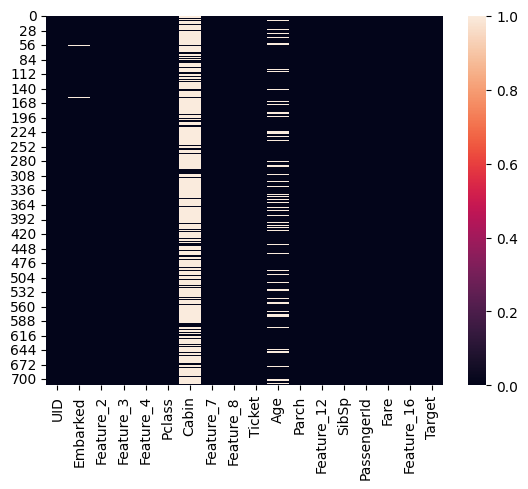

In [8]:
sns.heatmap(train_df.isna())


Filling the Age with avg mean Age per Pclass

In [9]:
train_df.groupby(["Pclass"])['Age'].mean()

Pclass
1    37.891049
2    29.843972
3    25.162917
Name: Age, dtype: float64

In [10]:
train_df.loc[train_df['Pclass'] == 1, 'Age'] = train_df[train_df['Pclass'] == 1]['Age'].fillna(37.891)
train_df.loc[train_df['Pclass'] == 2, 'Age'] = train_df[train_df['Pclass'] == 2]['Age'].fillna(29.843972)
train_df.loc[train_df['Pclass'] == 3, 'Age'] = train_df[train_df['Pclass'] == 3]['Age'].fillna(25.162917)

test_df.loc[test_df['Pclass'] == 1, 'Age'] = test_df[test_df['Pclass'] == 1]['Age'].fillna(37.891)
test_df.loc[test_df['Pclass'] == 2, 'Age'] = test_df[test_df['Pclass'] == 2]['Age'].fillna(29.843972)
test_df.loc[test_df['Pclass'] == 3, 'Age'] = test_df[test_df['Pclass'] == 3]['Age'].fillna(25.162917)

Dividing the Cabin into Cabin Number and Cabin Category

In [11]:
train_df['Cabin'] = train_df['Cabin'].fillna(-1)
test_df['Cabin'] = test_df['Cabin'].fillna(-1)

In [12]:
def divide(col):
    #print(col)
    #print(col is not pd.NA)
    if col != -1:

        col = col.split()[0]
        a = col[0]
        if len(col) > 1:
            b = col[1:]
        else:
            b = np.nan

        Feature_6_1.append(a)
        Feature_6_2.append(b)
    else:
        Feature_6_1.append(np.nan)
        Feature_6_2.append(np.nan)

Feature_6_1 = []
Feature_6_2 = []
train_df['Cabin'].apply(divide)
train_df['Cabin_C'] = Feature_6_1
train_df['Cabin_N'] = np.float64(Feature_6_2)
train_df = train_df.drop(['Cabin'], axis=1)

Feature_6_1 = []
Feature_6_2 = []
test_df['Cabin'].apply(divide)
test_df['Cabin_C'] = Feature_6_1
test_df['Cabin_N'] = np.float64(Feature_6_2)
test_df = test_df.drop(['Cabin'], axis=1)

Dividing Ticket into Ticket prefix and Ticket Number

In [13]:
train_df['Ticket_P'] = train_df['Ticket'].apply(lambda x: ' '.join(x.split()[:-1]))
train_df['Ticket_N'] = train_df['Ticket'].apply(lambda x: x.split()[-1])
train_df['Ticket_N'] = train_df['Ticket_N'].replace('LINE', -1)
train_df['Ticket_N'] = train_df['Ticket_N'].astype(int)
train_df['Ticket_P'] = train_df['Ticket_P'].replace('', np.nan)
train_df = train_df.drop(['Ticket'], axis=1)

test_df['Ticket_P'] = test_df['Ticket'].apply(lambda x: ' '.join(x.split()[:-1]))
test_df['Ticket_N'] = test_df['Ticket'].apply(lambda x: x.split()[-1])
test_df['Ticket_N'] = test_df['Ticket_N'].replace('LINE', -1)
test_df['Ticket_N'] = test_df['Ticket_N'].astype(int)
test_df['Ticket_P'] = test_df['Ticket_P'].replace('', np.nan)
test_df = test_df.drop(['Ticket'], axis=1)

In [14]:
cat_columns = ['Embarked', 'Pclass', 'Cabin_C', 'Ticket_P', 'Parch', 'Feature_12', 'SibSp', 'Feature_16']  #
num_columns = ['Feature_2', 'Feature_3', 'Feature_4', 'Feature_7', 'Feature_8', 'Age', 'PassengerId', 'Fare']

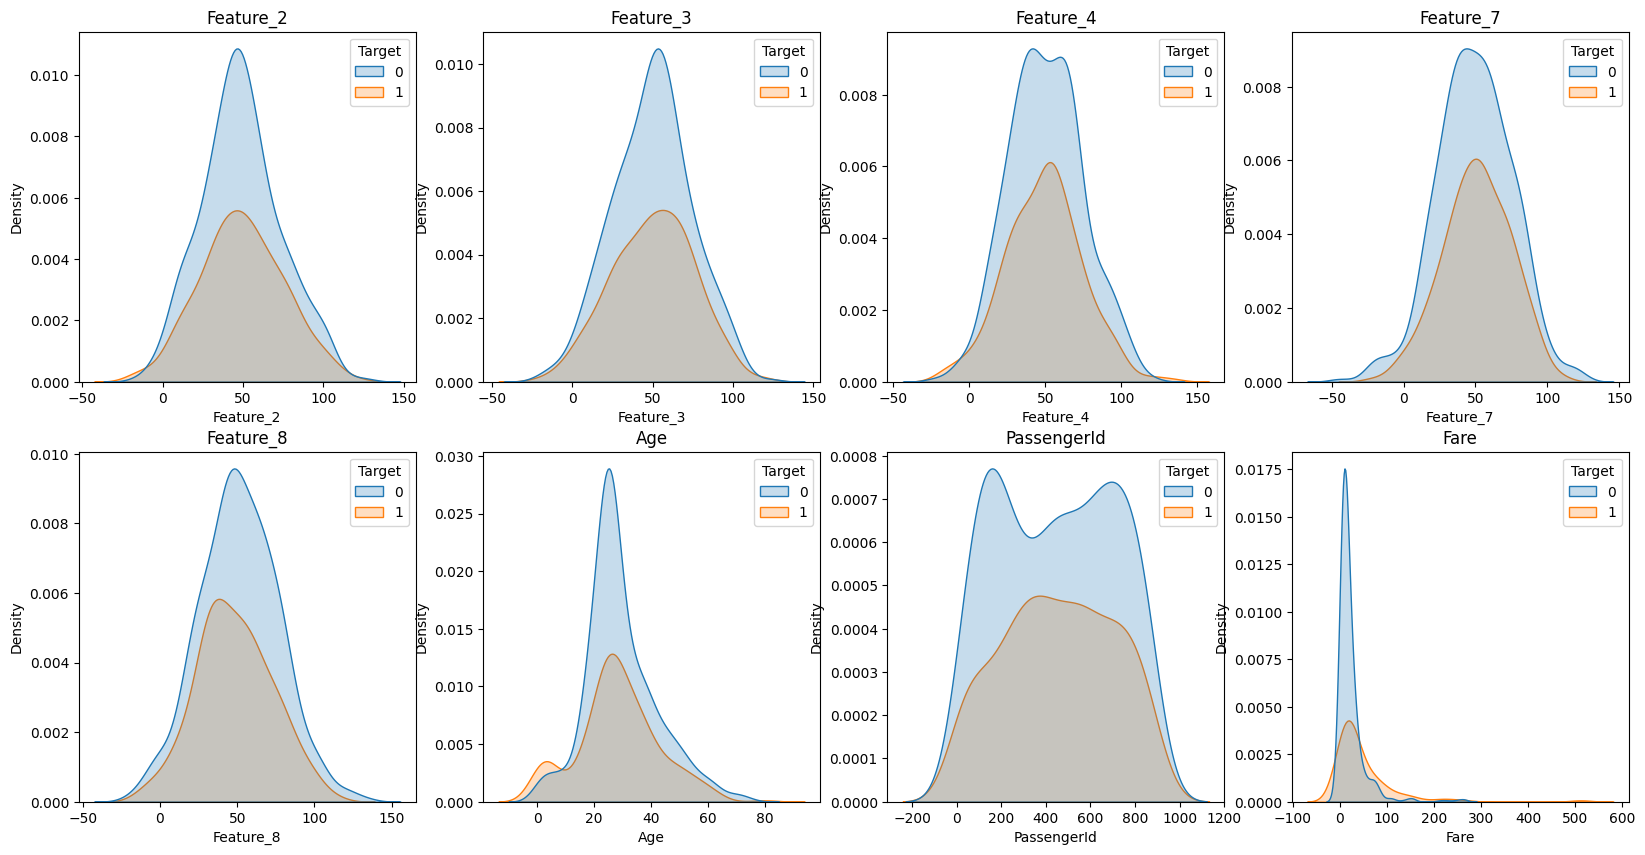

In [12]:
plt.subplots(figsize=(20, 10))
for i, col in enumerate(num_columns):
    plt.subplot(2, 4, i + 1)
    plt.title(col)
    sns.kdeplot(data=train_df, x=train_df[col], hue=train_df['Target'], fill=True)

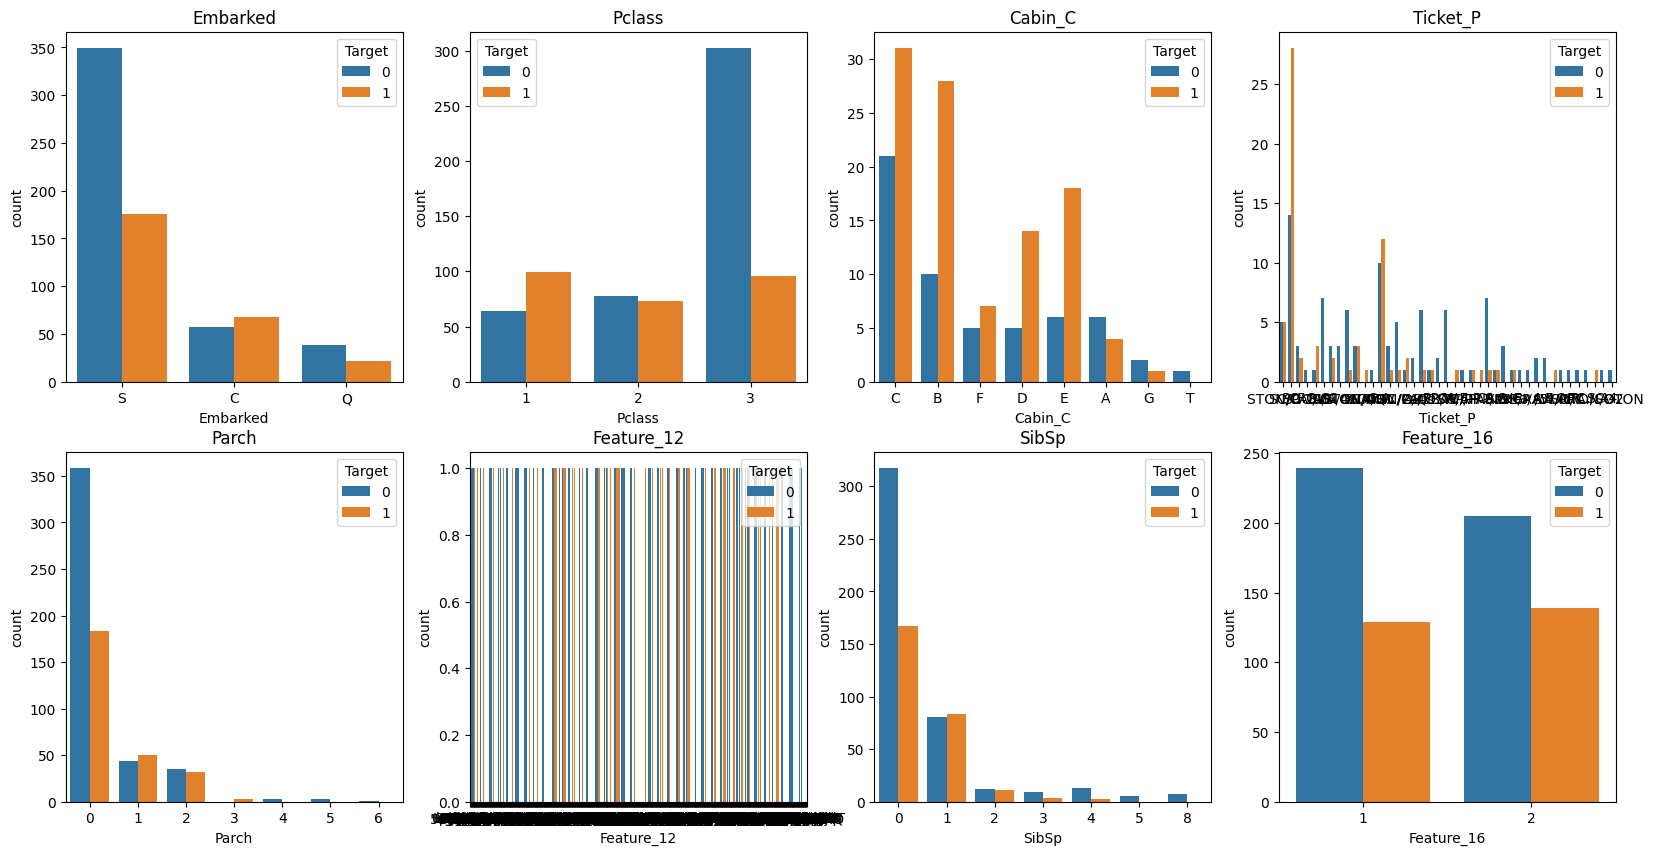

In [15]:
plt.subplots(figsize=(20, 10))
for i, col in enumerate(cat_columns):
    plt.subplot(2, 4, i + 1)
    plt.title(col)
    sns.countplot(data=train_df, x=train_df[col], hue=train_df['Target'])


Encode Categorical Columns

In [16]:
df = pd.concat([train_df, test_df])

In [17]:
OE = OrdinalEncoder()
OE.fit(df[['Cabin_C', 'Embarked', 'Ticket_P','Feature_12']])
train_df[['Cabin_C', 'Embarked', 'Ticket_P','Feature_12']] = OE.transform(train_df[['Cabin_C', 'Embarked', 'Ticket_P','Feature_12']])
test_df[['Cabin_C', 'Embarked', 'Ticket_P','Feature_12']] = OE.transform(test_df[['Cabin_C', 'Embarked', 'Ticket_P','Feature_12']])

<Axes: >

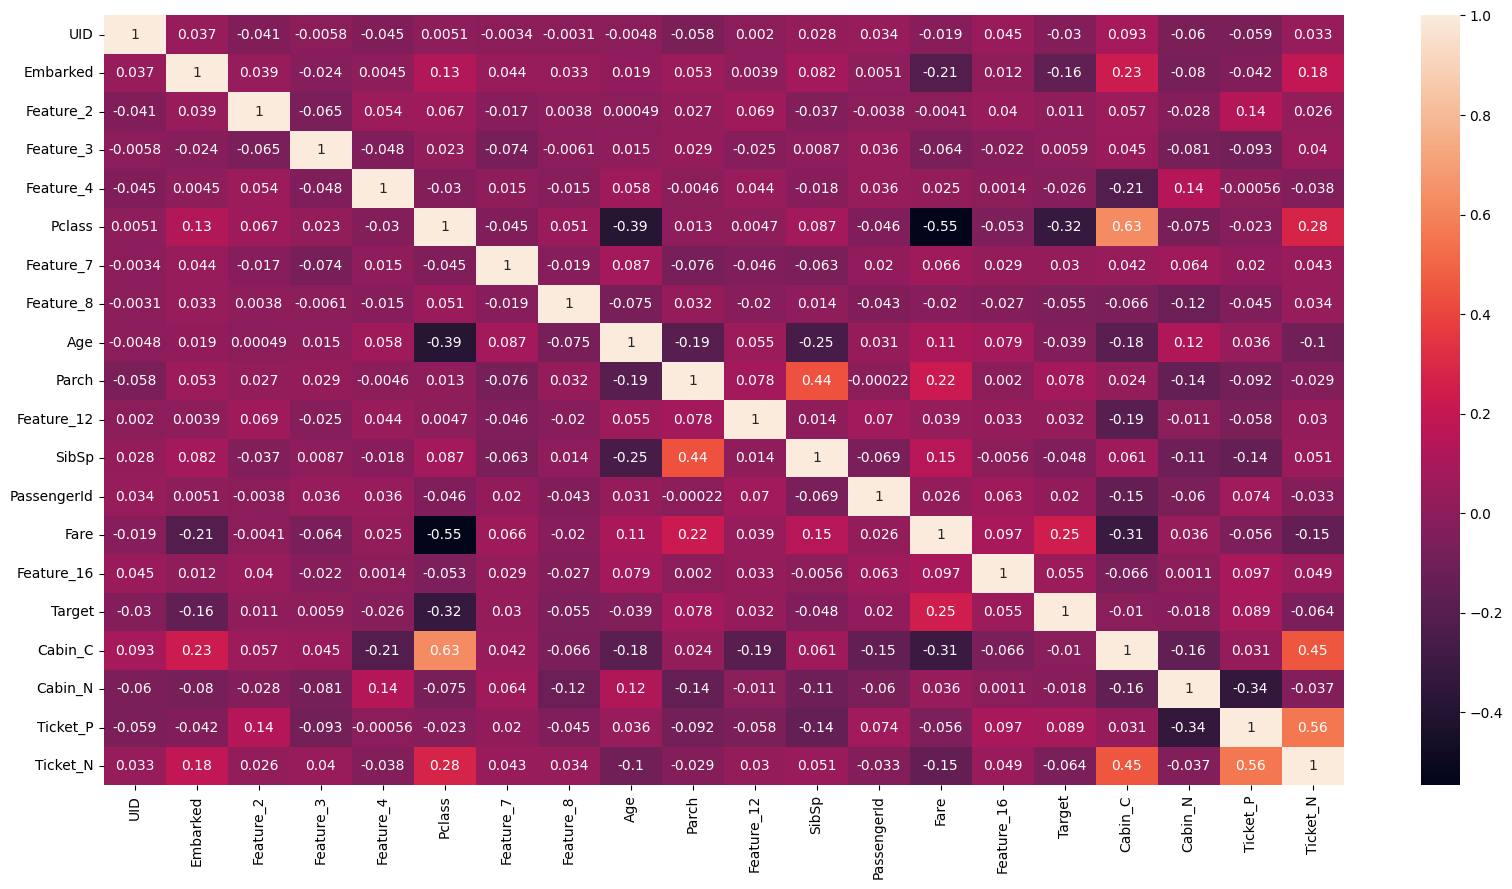

In [18]:
plt.figure(figsize=(20, 10))
sns.heatmap(train_df.corr(), annot=True)

Dropping Irrelevant Features

In [19]:
print("Number of Unique Values")
uni = []
for col in train_df.columns:
    uni.append([col,len(train_df[col].unique())])
pd.DataFrame(uni, columns=['Column', 'Unique'])

Number of Unique Values


,Column,Unique
0,UID,712
1,Embarked,4
2,Feature_2,120
3,Feature_3,120
4,Feature_4,119
5,Pclass,3
6,Feature_7,122
7,Feature_8,123
8,Age,86
9,Parch,7


In [18]:
train_df = train_df.drop(['UID', 'PassengerId','Feature_3', 'Feature_12'], axis=1)
test_df = test_df.drop(['UID', 'PassengerId','Feature_3' ,'Feature_12'], axis=1)

In [20]:
train_df.head()

,UID,Embarked,Feature_2,Feature_3,Feature_4,Pclass,Feature_7,Feature_8,Age,Parch,Feature_12,SibSp,PassengerId,Fare,Feature_16,Target,Cabin_C,Cabin_N,Ticket_P,Ticket_N
0,1,2.0,45,11,39,1,45,30,45.5,0,76.0,0,332,28.5000,2,0,2.0,124.0,NaN,113043
1,2,2.0,74,35,36,2,14,99,23.0,0,678.0,0,734,13.0000,1,0,NaN,NaN,NaN,28425
2,3,2.0,62,38,100,3,65,47,32.0,0,249.0,0,383,7.9250,2,0,NaN,NaN,36.0,3101293
3,4,2.0,59,94,-3,3,17,26,26.0,0,152.0,1,705,7.8542,1,0,NaN,NaN,NaN,350025
4,5,2.0,26,72,33,3,45,17,6.0,2,138.0,4,814,31.2750,2,0,NaN,NaN,NaN,347082


# MODEL BUILDING

In [21]:
params = {'n_estimators': 940,
 'learning_rate': 0.008692710190262062,
 'num_leaves': 222,
 'max_depth': 34,
 'min_child_samples': 3,
 'min_child_weight': 2.2925784587820475e-05,
 'subsample': 0.5855465033589249,
 'colsample_bytree': 0.829840841251295,
 'reg_alpha': 1.3465288861115076e-06,
 'reg_lambda': 1.0662155394739558e-06,
 'min_split_gain': 0.417304727078673,
 'boosting_type': 'goss',
 'class_weight': 'balanced',
 'verbose':-1,
 'random_state': 42
 }

In [22]:
X = train_df.drop(['Target'], axis=1)
y = train_df['Target']

In [23]:
model = LGBMClassifier(**params)
model.fit(X,y)

LGBMClassifier(boosting_type='goss', class_weight='balanced',
               colsample_bytree=0.829840841251295,
               learning_rate=0.008692710190262062, max_depth=34,
               min_child_samples=3, min_child_weight=2.2925784587820475e-05,
               min_split_gain=0.417304727078673, n_estimators=940,
               num_leaves=222, random_state=42,
               reg_alpha=1.3465288861115076e-06,
               reg_lambda=1.0662155394739558e-06, subsample=0.5855465033589249,
               verbose=-1)

In [24]:
preds = model.predict(test_df)

In [25]:
submission['Target'] = preds
submission.to_csv('submission.csv', index=False)